In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from lxml import etree
from lxml import objectify
import numpy as np

In [ ]:
xml_data = objectify.parse('generation_fuel_type_multiday.xml')  # Parse XML data
root = xml_data.getroot()
lst = []
data = []
cols = []

for i in root.getchildren():
  if str(type(i)) == "<class 'lxml.objectify.ObjectifiedElement'>":
    lst.append(i)
    cols.append(i.attrib['Series'])

for child in lst:
  tmp = child.getchildren()
  arr = []
  for subchild in tmp:
    val = subchild.getchildren()
    arr.append(val[0])
  data.append(arr)

print([len(data[0]), len(data[1]), len(data[2])])

for i in range(len(data)):
  data[i] = data[i][:-5]
  data[i] = list(map(float, data[i]))


df = pd.DataFrame(data).T
cols = ["Supply_" + name for name in cols]
df.columns = cols
df

[145, 145, 145]


,Supply_BIOFUEL,Supply_GAS,Supply_HYDRO,Supply_NUCLEAR,Supply_SOLAR,Supply_WIND
0,23.0,2168.0,4564.0,9243.0,0.0,169.0
1,21.0,1831.0,4463.0,9241.0,0.0,180.0
2,21.0,1710.0,4368.0,9241.0,0.0,116.0
3,21.0,1842.0,4272.0,9236.0,0.0,124.0
4,21.0,2064.0,4230.0,9232.0,0.0,128.0
...,...,...,...,...,...,...
135,50.0,1771.0,4999.0,9506.0,28.0,3041.0
136,81.0,1771.0,5017.0,9508.0,16.0,3075.0
137,87.0,1769.0,5319.0,9511.0,3.0,3140.0
138,78.0,1782.0,5740.0,9501.0,0.0,3099.0


In [ ]:
# Hourly Ontario Energy Price (HOEP)
# Market clearing price (MCP)

xml_data = objectify.parse('price_multiday.xml')  # Parse XML data
root = xml_data.getroot()
lst = []
data = []
cols = []

for i in root.getchildren():
  if str(type(i)) == "<class 'lxml.objectify.ObjectifiedElement'>":
    lst.append(i)
    cols.append(i.attrib['Series'])

for child in lst:
  tmp = child.getchildren()
  arr = []
  for subchild in tmp:
    val = subchild.getchildren()
    arr.append(val[0])
  data.append(arr)

price_mcp = data[2]
print([len(data[0]), len(data[1]), len(data[2])])

df2 = pd.DataFrame(data).T
df2_cp = df2.copy()
df2.dropna(axis=0, inplace=True)
df2 = df2.loc[:140]
df2

data = df2.T.values.tolist()

#Weird element found
idx = data[0].index('')

for i in range(len(data)):
  data[i].pop(idx)
  data[i] = list(map(float, data[i]))

df2 = pd.DataFrame(data).T
cols = ["Price_" + name for name in cols]
df2.columns = cols
df2

[145, 145, 1729]


,Price_HOEP,Price_HOEP_Projected,Price_MCP
0,39.34,38.70,38.70
1,39.78,38.67,39.80
2,39.87,38.66,38.66
3,44.69,47.88,38.66
4,51.23,52.29,39.81
...,...,...,...
135,39.57,41.32,47.90
136,36.66,41.62,47.89
137,39.31,46.45,47.90
138,40.21,43.43,47.91


In [ ]:
xml_data = objectify.parse('ontario_demand_multiday.xml')  # Parse XML data
root = xml_data.getroot()
lst = []
data = []
cols = []

for i in root.getchildren():
  if str(type(i)) == "<class 'lxml.objectify.ObjectifiedElement'>":
    lst.append(i)
    cols.append(i.attrib['Series'])

for child in lst:
  tmp = child.getchildren()
  arr = []
  for subchild in tmp:
    val = subchild.getchildren()
    arr.append(val[0])
  data.append(arr)

print([len(data[0]), len(data[1]), len(data[2])])
demand = data[0]

df3 = pd.DataFrame(data).T
df3_cp = df3.copy()
df3.dropna(axis=0, inplace=True)
df3 = df3.loc[:140]

data = df3.T.values.tolist()

#Weird element found
idx = data[1].index('')

for i in range(len(data)):
  data[i].pop(idx)
  data[i] = list(map(float, data[i]))

df3 = pd.DataFrame(data).T
cols = ["Demand_" + name for name in cols]
df3.columns = cols
df3

[1729, 145, 169]


,Demand_5_Minute,Demand_Actual,Demand_Projected
0,15314.0,15638.6,15842.0
1,15221.3,15136.6,15323.0
2,15226.4,14748.1,14917.0
3,15232.2,14523.3,14698.0
4,15242.4,14391.6,14598.0
...,...,...,...
135,17367.7,18538.7,19197.0
136,17344.6,18914.9,19757.0
137,17202.2,19393.4,20005.0
138,17256.5,19217.6,19659.0


In [ ]:
# df = pd.concat([df, df2, df3], axis=1)
# df.to_csv('5minutes.csv')

In [ ]:
1729/145

11.924137931034483

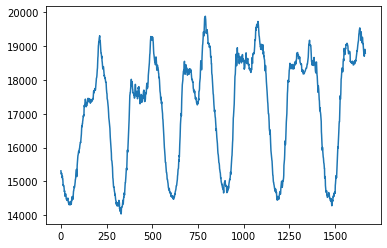

In [ ]:
plot_val = []
for i in range(len(df3_cp[0])):
  if str(type(df3_cp[0].values[i])) == "<class 'lxml.objectify.FloatElement'>":
    plot_val.append(float(df3_cp[0].values[i]))
plt.plot(plot_val)

In [ ]:
len(plot_val)

1666

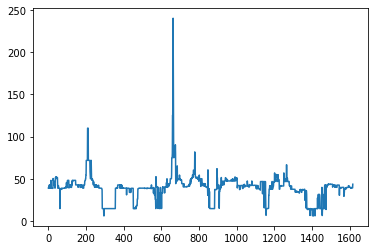

In [ ]:
plot_val = []
for i in range(len(df2_cp[2])):
  if str(type(df2_cp[2].values[i])) == "<class 'lxml.objectify.FloatElement'>":
    plot_val.append(float(df2_cp[2].values[i]))
plt.plot(plot_val)

In [ ]:
len(plot_val)

1617